In [1]:
import numpy as np
import pandas as pd

In [2]:
# Read the dataset
df=pd.read_csv('../input/vehicle-dataset-from-cardekho/car data.csv')
df.shape, df.columns

((301, 9),
 Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
        'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
       dtype='object'))

In [3]:
print(df['Seller_Type'].unique())
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


In [4]:
##check missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
#Filter Dataset and add column with Current year
final_dataset=df[['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]
final_dataset['Current Year']=2021
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [7]:
# Add new column with Age of vehicle
final_dataset['Age']=final_dataset['Current Year']- final_dataset['Year']

In [8]:
# Convert categorical columns with get_dummies
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

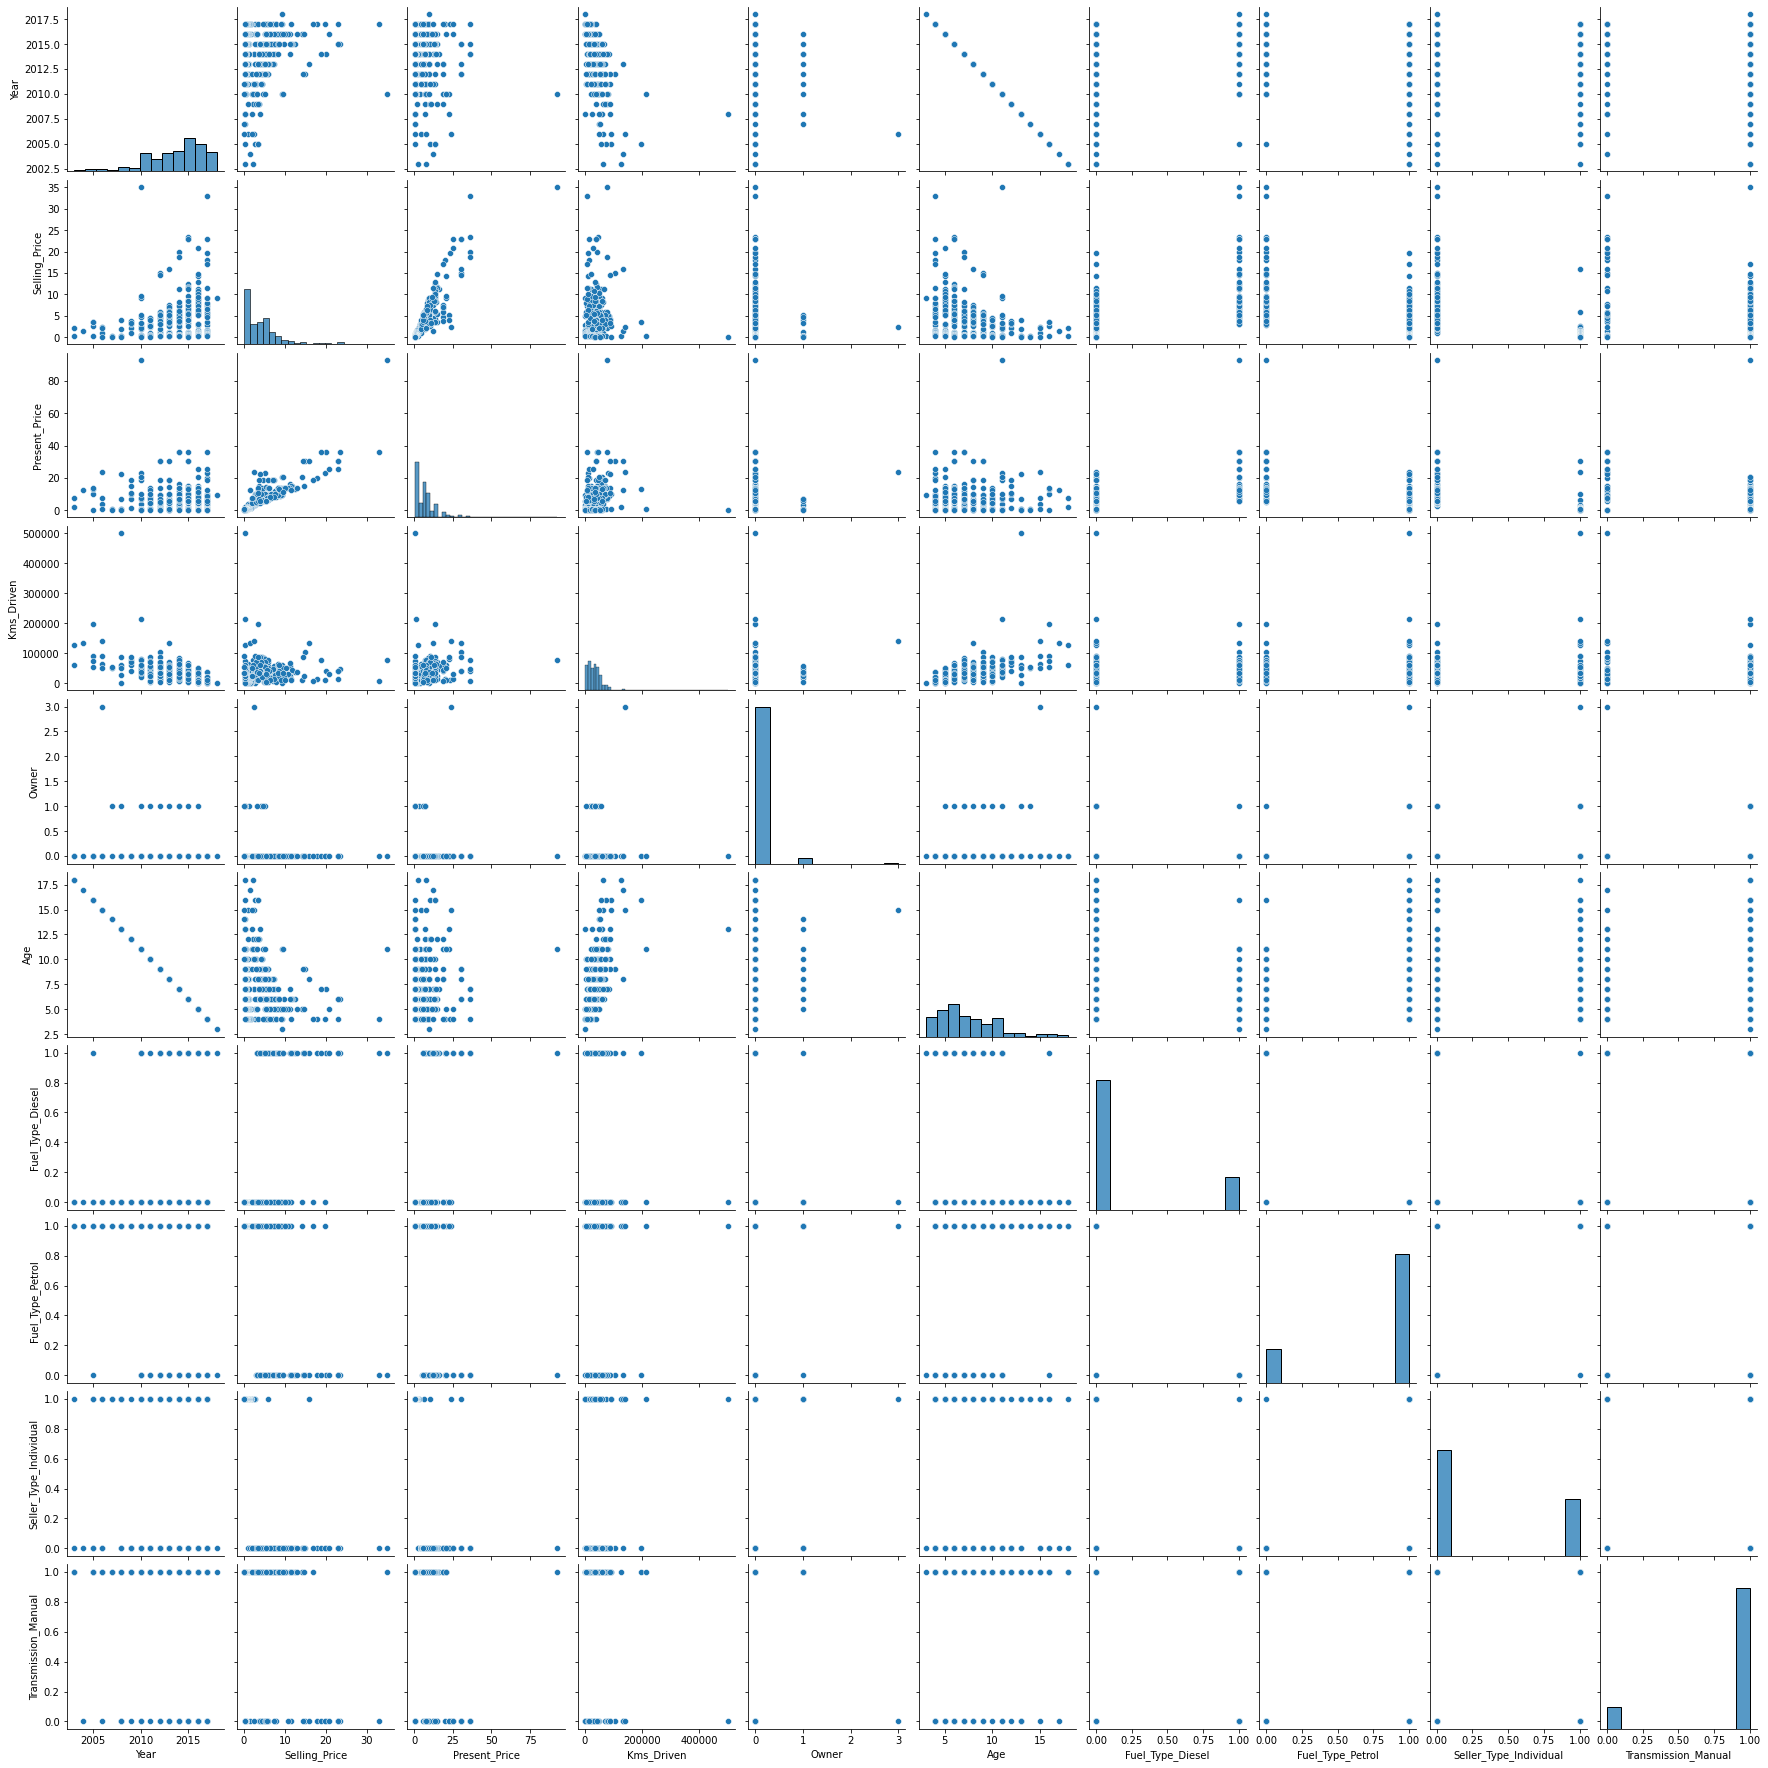

In [9]:
# Pairplot
import seaborn as sns
final_dataset=final_dataset.drop(['Current Year'],axis=1)
final_dataset.corr()
sns.pairplot(final_dataset)

In [ ]:
#get correlations of each features in dataset
import seaborn as sns
import matplotlib.pyplot as plt

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
final_dataset.head()

In [ ]:
# Set up x and y(target) data
y=final_dataset['Selling_Price']
x= final_dataset[['Present_Price', 'Kms_Driven', 'Owner', 'Age','Fuel_Type_Diesel', 
                 'Fuel_Type_Petrol', 'Seller_Type_Individual','Transmission_Manual']]

In [ ]:
# Find feature Importance from ExtraTreeregg
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x,y)
#plot graph of feature importances 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [ ]:
from sklearn import model_selection
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import neighbors
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
import random

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#!pip install xgboost==1.3.3

In [ ]:
# Find performance of each model
outcome = []
model_names = []
models = [('CatBoost', CatBoostRegressor(verbose=0, n_estimators=100)), 
          ('RandomForest', RandomForestRegressor(n_estimators=100)), 
          ('DecTree', DecisionTreeRegressor(max_depth=5)),
          ('ExtraTrees', ExtraTreesRegressor(n_estimators=100)),
          ('KNN', neighbors.KNeighborsRegressor(n_neighbors = 5)),
          ('LGBM', LGBMRegressor()),
          ('XGB', XGBRegressor()),
          ('GB',GradientBoostingRegressor())]



for model_name, model in models:
    k_fold_validation = model_selection.KFold(n_splits=5, random_state=30, shuffle= True)
    results = model_selection.cross_val_score(model, x, y, cv=k_fold_validation, scoring='neg_root_mean_squared_error')
    outcome.append(results)
    model_names.append(model_name)
    output_message = "%s| Mean=%f STD=%f Min=%f Max=%f" % (model_name, results.mean(), results.std(), results.min(), results.max())
    print(output_message)

In [ ]:

import sklearn
print(sorted(sklearn.metrics.SCORERS.keys()))